# 1. importation de la librairie

In [3]:
# 1. importation de la librairie
import numpy as np
import pandas as pd

# 2. chargement des donnees

In [4]:
data = pd.read_csv('Data/studentscores.csv')

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [6]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [17]:
data['Hours'].max()

np.float64(9.2)

In [13]:
data['Hours'].min()

np.float64(1.1)

In [14]:
print(data['Hours'].max())

9.2


In [15]:
print("Max Score: ", data['Scores'].max())

Max Score:  95


In [16]:
print("Min Score: ", data['Scores'].min())

Min Score:  17


# 4. Division des donnees

### Variables indep et variables dep

In [18]:
x = data.iloc[ :, :-1].values
y = data.iloc[ :, -1].values

In [19]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## 4.1 separation de donnees : Train et Test

In [21]:
# x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [22]:
train_test_split(x, y, test_size=0.25, random_state=40)

[array([[3.2],
        [5.9],
        [1.9],
        [3.5],
        [8.3],
        [2.5],
        [3.8],
        [2.7],
        [2.5],
        [2.7],
        [7.7],
        [6.9],
        [4.5],
        [5.1],
        [6.1],
        [1.5],
        [5.5],
        [9.2]]),
 array([[8.9],
        [7.8],
        [1.1],
        [7.4],
        [3.3],
        [8.5],
        [4.8]]),
 array([27, 62, 24, 30, 81, 30, 35, 30, 21, 25, 85, 76, 41, 47, 67, 20, 60,
        88]),
 array([95, 86, 17, 69, 42, 75, 54])]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [25]:
print("x_train_Shape:", x_train.shape)

x_train_Shape: (18, 1)


In [26]:
print("x_test_Shape:", x_test.shape)

x_test_Shape: (7, 1)


In [27]:
print("y_train_Shape:", y_train.shape)

y_train_Shape: (18,)


In [28]:
print("y_test_Shape:", y_test.shape)

y_test_Shape: (7,)


# 5. construction du modele

In [29]:
# importer l'algorithme de la Regression linear
from sklearn.linear_model import LinearRegression

In [31]:
modele_lineaire = LinearRegression()

In [32]:
# entrainement du modele
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [34]:
# faire de prediction 
y_scores_predits = modele_lineaire.predict(x_test)

In [36]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [42]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [43]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
print("MSE de la Regression Lineaire:", mean_squared_error(y_test, y_scores_predits))

MSE de la Regression Lineaire: 51.90159659147337


In [45]:
print("R2 Score de la Regression Lineaire:", r2_score(
    y_test, y_scores_predits))

R2 Score de la Regression Lineaire: 0.9168569951293908


# 6. Visualisation de resultats

In [52]:
import matplotlib.pyplot as plt

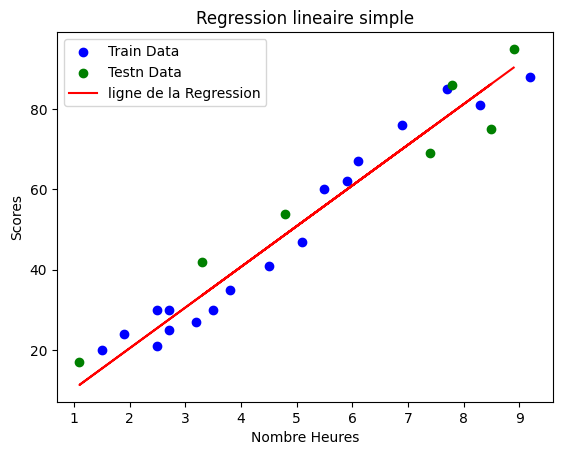

In [56]:
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Testn Data')
plt.plot(x_test, y_scores_predits, color='red', label='ligne de la Regression')
# ou encore plt.plot(x_train, modele_lineaire.predict(x_train), color='red', label='ligne de la Regression')
plt.xlabel('Nombre Heures')
plt.ylabel('Scores')
plt.title('Regression lineaire simple')
plt.legend()
plt.show()

In [57]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 7. Prediction simple

In [71]:
resultats = pd.DataFrame({'y-score-reel' : y_test, 'y_scores_predits': y_scores_predits}) 
resultats

,y-score-reel,y_scores_predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [72]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [73]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [77]:
resultats = pd.DataFrame({'y-score-reel' : y_test, 'y_scores_predits': y_scores_predits, 'reste':resultats['y-score-reel']-resultats['y_scores_predits']}) 
resultats

,y-score-reel,y_scores_predits,reste
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639
